In [3]:
import numpy as np
import json
import plotly.express as px
import pandas as pd

In [4]:
with open('../../../карта/map.geojson', encoding="utf-8") as f:
    geojson = json.load(f)

geojson

{'bbox': [-180, 41.18678, 180, 81.857324],
 'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Республика Бурятия',
    'cartodb_id': 10,
    'created_at': '2013-12-04T04:23:51+0100',
    'updated_at': '2013-12-04T08:04:02+0100',
    'name_latin': 'Republic of Buryatia'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[99.230567, 52.963186],
      [99.25523, 52.950453],
      [99.273846, 52.931484],
      [99.258823, 52.93377],
      [99.223225, 52.911944],
      [99.231227, 52.868699],
      [99.204011, 52.87436],
      [99.170972, 52.864426],
      [99.120079, 52.873489],
      [99.103097, 52.882524],
      [99.021124, 52.905575],
      [98.973497, 52.934314],
      [98.96272, 52.930178],
      [98.937518, 52.937471],
      [98.909813, 52.900949],
      [98.893212, 52.896349],
      [98.901703, 52.872509],
      [98.872365, 52.86478],
      [98.860934, 52.839878],
      [98.850266, 52.832802],
      [98.86948, 52.813806],
      [98.8508

In [5]:
labels = np.load('data/labels.npy', allow_pickle=True)

In [30]:
start_city = 9
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

scatter_data = {
    'lag': lags,
    'region': labels,
    'flow': flows
}

scatter_data = pd.DataFrame(scatter_data)
scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data

lag                           region          flow
0   114               Республика Бурятия  7.770410e-06
1   101  Карачаево-Черкесская Республика  6.046318e-07
2   130              Сахалинская область  1.366686e-05
3   101              Воронежская область  3.231038e-06
4   109                  Томская область  3.395586e-06
..  ...                              ...           ...
84  105                  Республика Крым  2.311074e-06
85  106               Херсонская область  1.226376e-06
86  108              Запорожская область  2.083737e-06
87  106     Донецкая Народная Республика  2.899347e-06
88   63    Луганская Народная Республика  1.905637e-06

[87 rows x 3 columns]

In [ ]:
fig = px.scatter(scatter_data, x='flow', y='lag', log_x=True, hover_name='region', trendline="ols", trendline_options=dict(log_x=True), title=f'Начало в регионе {labels[start_city]}, без Дейкстры')
fig.show()

In [ ]:
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]

print(log_flows)

import scipy.sparse as sps

graph = sps.csr_array(log_flows)

dist_matrix, predecessors = sps.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
dist_matrix

scatter_data = {
    'lag': lags,
    'region': labels,
    'flow': dist_matrix[start_city,:]
}

scatter_data = pd.DataFrame(scatter_data)
scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data

[[16.          5.98872441  5.5312697  ...  5.45806419  5.30796405
   5.48457664]
 [ 5.67009762 16.          6.24280557 ...  4.08626776  3.91296793
   4.15838811]
 [ 5.20962293  6.23978559 16.         ...  5.69404388  5.55140259
   5.73376977]
 ...
 [ 5.68906787  4.63589823  6.24669433 ... 16.          3.12537653
   3.71279186]
 [ 5.66672057  4.59035125  6.23180589 ...  3.25312937 16.
   3.21176932]
 [ 5.64753737  4.63997562  6.21837728 ...  3.6447489   3.01597352
  16.        ]]


lag                           region      flow
0   114               Республика Бурятия  4.834121
1   101  Карачаево-Черкесская Республика  5.624447
2   130              Сахалинская область  4.267249
3   101              Воронежская область  5.490658
4   109                  Томская область  5.229447
..  ...                              ...       ...
84  105                  Республика Крым  5.636186
85  106               Херсонская область  5.651925
86  108              Запорожская область  5.636725
87  106     Донецкая Народная Республика  5.537700
88   63    Луганская Народная Республика  5.607485

[87 rows x 3 columns]

In [ ]:
fig = px.scatter(scatter_data, x='flow', y='lag', log_x=True, hover_name='region', trendline="ols", trendline_options=dict(log_x=True), title=f'Начало в регионе {labels[start_city]}, Флойд-Варшалл')
fig.show()

In [ ]:
# start_city = 12
# duration = 300
# dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
# flows = np.load('data/flows.npy', allow_pickle=True)

# scatter_data = {
#     'lag': np.array([np.argmax(dt[j,:]) - np.argmax(dt[i,:]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'start': np.array([labels[i] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'region': np.array([labels[j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'log_flow': np.array([np.log10(flows[i, j]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0])
# }

# scatter_data = pd.DataFrame(scatter_data)
# # scatter_data = scatter_data[scatter_data['lag'] > 0]
# scatter_data[scatter_data['start'] == 'Москва'].sort_values(by='log_flow')

dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
flows = np.load('data/flows.npy', allow_pickle=True)

scatter_data = {
    'lag': np.array([np.argmax(dt[j,:]) - np.argmax(dt[i,:]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'start': np.array([labels[i] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'region': np.array([labels[j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'log_flow': np.array([dist_matrix[i,j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0])
}

scatter_data = pd.DataFrame(scatter_data)
# scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data[scatter_data['start'] == 'Москва'].sort_values(by='log_flow')

lag   start                           region  log_flow
524    3  Москва               Московская область  1.071233
526    1  Москва                Псковская область  3.103780
527    2  Москва             Республика Татарстан  3.413935
525    4  Москва               Мурманская область  3.719673
531   27  Москва  Кабардино-Балкарская Республика  3.737369
529   30  Москва                Ямало-Ненецкий АО  4.063308
522    4  Москва            Новосибирская область  4.147733
535    5  Москва              Кемеровская область  4.253555
536   12  Москва               Республика Хакасия  4.298030
523    8  Москва                  Республика Тыва  4.368723
532    5  Москва                Иркутская область  4.427340
530    2  Москва       Республика Саха ( Якутия )  4.514789
528   20  Москва               Забайкальский край  4.543858
533    9  Москва                 Амурская область  4.617458
534   10  Москва                 Хабаровский край  4.660528
521   15  Москва              Сахалинская область  4.731321

In [ ]:
import scipy.stats as sps

slopes = []
r2_threshold = 0.05

for start in scatter_data['start'].unique():
    slope, intercept, r_value, p_value, std_err = sps.linregress(
        x = scatter_data[scatter_data['start'] == start]['log_flow'], 
        y = scatter_data[scatter_data['start'] == start]['lag']
    )

    scatter_data.loc[scatter_data['start'] == start, 'r2'] = r_value**2
    scatter_data.loc[scatter_data['start'] == start, 'slope'] = slope
    if r_value**2 > r2_threshold:
        slopes.append(slope)

np.sort(scatter_data['r2'].unique())[::-1]
scatter_data

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10919: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10933: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10936: RuntimeWarning:

invalid value encountered in scalar divide



lag                          start                        region  \
0      16             Республика Бурятия           Сахалинская область   
1       5             Республика Бурятия         Новосибирская область   
2       1             Республика Бурятия                        Москва   
3       9             Республика Бурятия               Республика Тыва   
4       4             Республика Бурятия            Московская область   
...   ...                            ...                           ...   
3748   43  Луганская Народная Республика                г. Севастополь   
3749   42  Луганская Народная Республика               Республика Крым   
3750   43  Луганская Народная Республика            Херсонская область   
3751   45  Луганская Народная Республика           Запорожская область   
3752   43  Луганская Народная Республика  Донецкая Народная Республика   

      log_flow        r2     slope  
0     5.209623  0.040806  3.676195  
1     4.596955  0.040806  3.676195  
2     4.484211  0.040806  3.676195  
3     4.630276  0.040806  3.676195  
4     4.663982  0.040806  3.676195  
...        ...       ...       ...  
3748  4.187013  0.195817  6.486929  
3749  3.942112  0.195817  6.486929  
3750  3.997368  0.195817  6.486929  
3751  3.644749  0.195817  6.486929  
3752  3.015974  0.195817  6.486929  

[3753 rows x 6 columns]

In [ ]:
fig = px.scatter(scatter_data[scatter_data['r2'] > r2_threshold], x='log_flow', y='lag', color='start', hover_name='region', trendline="ols")
fig.show()

[Text(0.5, 1.0, 'Начало в Приморский край')]

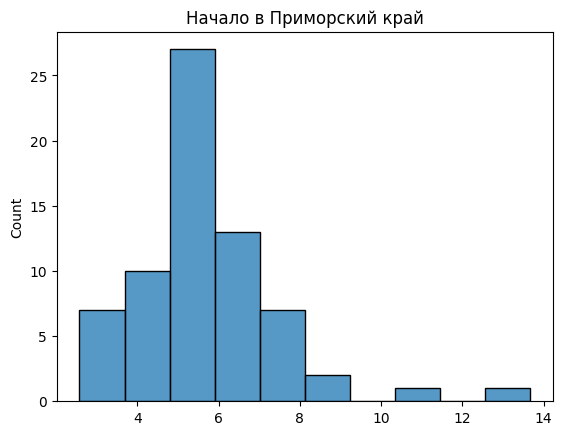

In [ ]:
import seaborn as sns

slopes = np.array(slopes)
slopes = slopes[slopes > 0]
sns.histplot(slopes, bins=10).set(title=f'Начало в {labels[start_city]}')

In [ ]:
start_city = 12
duration = 300
step = 5
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
flows = np.load('data/flows.npy', allow_pickle=True)

map_data = {
    'day': np.array([j for _ in range(len(labels)) for j in range(0, duration, step)]),
    'region': np.array([labels[i] for i in range(len(labels)) for _ in range(0, duration, step)]),
    'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
}

map_data = pd.DataFrame(map_data)
map_data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4248661594.py:10: RuntimeWarning:

invalid value encountered in scalar divide



day                         region  new_infections
0       0             Республика Бурятия        0.000000
1       5             Республика Бурятия        0.000000
2      10             Республика Бурятия        0.000000
3      15             Республика Бурятия        0.000000
4      20             Республика Бурятия        0.000000
...   ...                            ...             ...
5335  275  Луганская Народная Республика        0.000391
5336  280  Луганская Народная Республика        0.000196
5337  285  Луганская Народная Республика        0.000391
5338  290  Луганская Народная Республика        0.000000
5339  295  Луганская Народная Республика        0.000391

[5340 rows x 3 columns]

In [ ]:
# fig = px.choropleth_mapbox(
#     map_data,
#     geojson=geojson,
#     locations='region',
#     color='new_infections',
#     featureidkey="properties.name",
#     animation_frame='day',
#     mapbox_style="carto-positron",
#     zoom=2.5,
#     center={"lat": 60, "lon": 95},  # координаты центра
#     color_continuous_scale="Viridis",
#     range_color=[map_data['new_infections'].min(), map_data['new_infections'].max()]
# )

# # Настройка анимации
# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
# fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 200

# # Настройка отображения
# fig.update_layout(
#     margin={"r":0,"t":0,"l":0,"b":0},
#     coloraxis_colorbar={
#         'title': 'Value'
#     }
# )

# fig.write_html(f"{labels[start_city]}.html")

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

gdf = gpd.read_file('../../../карта/map.geojson')

selected_days = [80, 125, 145, 165, 185]
lbls = ['Приморском крае', 'Москве']

A4_WIDTH = 8.27 
A4_HEIGHT = 11.69/1

with PdfPages('graphs/country_map.pdf') as pdf:
    fig, axes = plt.subplots(len(selected_days), 2, figsize=(A4_WIDTH, A4_HEIGHT))
    for j, start_city in enumerate([9, 12]):
        duration = 300
        step = 5
        dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
        flows = np.load('data/flows.npy', allow_pickle=True)

        map_data = {
            'day': np.array([j for _ in range(len(labels)) for j in range(0, duration, step)]),
            'region': np.array([labels[i] for i in range(len(labels)) for _ in range(0, duration, step)]),
            'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
        }

        map_data = pd.DataFrame(map_data)

        
        for i, day in enumerate(selected_days):
            ax = axes[i, j]

            day_data = map_data[map_data['day'] == day]
            
            
            merged = gdf.merge(day_data, 
                            left_on='name', 
                            right_on='region',
                            how='left')
            

            merged.plot(column='new_infections', 
                    ax=ax, 
                    cmap='magma',
                    vmin=map_data['new_infections'].min(),
                    vmax=map_data['new_infections'].max(),
                    missing_kwds={'color': 'lightgrey'})
            
            ax.set_title(f'День {day}, начало в {lbls[j]}')
            ax.set_axis_off()
            ax.set_xlim([15, 180]) 
            ax.set_ylim([41, 77]) 
    
    plt.tight_layout()
    pdf.savefig(fig)
    plt.savefig('graphs/country_map.png', dpi=600)
    plt.close()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4201318342.py:25: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4201318342.py:25: RuntimeWarning:

invalid value encountered in scalar divide



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4168\1309970321.py:20: RuntimeWarning: invalid value encountered in scalar divide
  'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
MovieWriter ffmpeg unavailable; using Pillow instead.


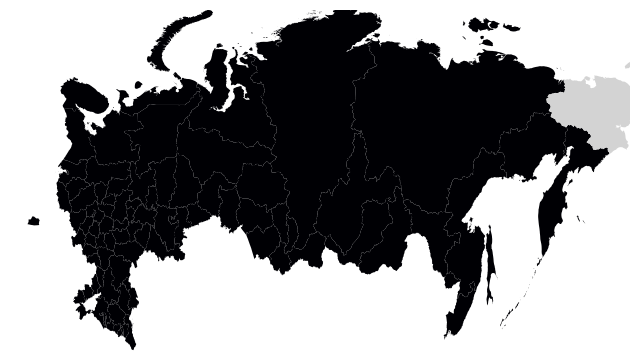

In [ ]:
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

gdf = gpd.read_file('../../../карта/map.geojson')

start_city = 12

duration = 300
step = 1
labels = np.load('data/labels.npy', allow_pickle=True)
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
flows = np.load('data/flows.npy', allow_pickle=True)

map_data = {
    'day': np.array([j for _ in range(len(labels)) for j in range(0, duration, step)]),
    'region': np.array([labels[i] for i in range(len(labels)) for _ in range(0, duration, step)]),
    'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
}

map_data = pd.DataFrame(map_data)

fig, ax = plt.subplots(figsize=(8, 6))

start_anim = 100

def update(day):
    ax.clear()
    
    day_data = map_data[map_data['day'] == start_anim+day]
    
    merged = gdf.merge(day_data, 
                    left_on='name', 
                    right_on='region',
                    how='left')
    
    merged.plot(column='new_infections', 
            ax=ax, 
            cmap='magma',
            vmin=map_data['new_infections'].min(),
            vmax=map_data['new_infections'].max(),
            missing_kwds={'color': 'lightgrey'})
    
    # ax.set_title(f'День {day}, начало в {lbls[j]}')
    ax.set_axis_off()
    ax.set_xlim([15, 180]) 
    ax.set_ylim([41, 77]) 

    # ax.set_title(f"MDS, день {start_anim+day}")


ani = FuncAnimation(fig, update, frames=duration-start_anim, interval=100, repeat=True)

try:
    ani.save(f'graphs/country_map_animation.mp4', writer='ffmpeg', fps=10)
except:
    ani.save(f'graphs/country_map_animation.gif', writer='pillow', fps=10)

plt.show()

116.44296953075391 1.3195810946924889 0.00412414143383418
10.56763606748895
184.76119676028088 14.21128437682018 0.2249043469238221
-52.97788398624446 -24.001494482301684 0.81616895310651
10.19185182165958
-50.80839617080705 -30.642190482963418 0.7068649683593767


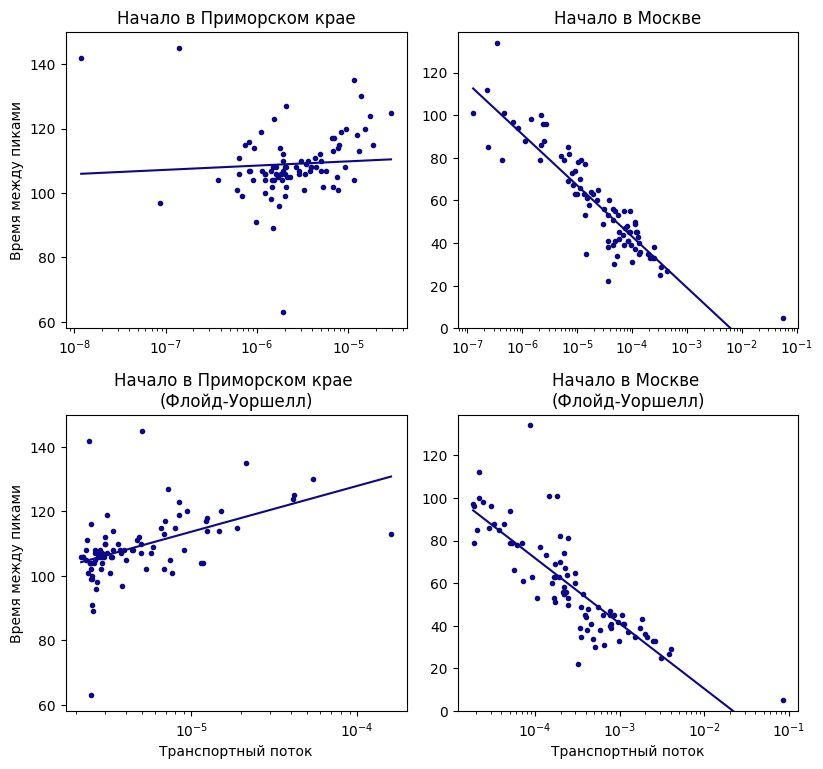

In [ ]:
import scipy.sparse as sparse
import scipy.stats as sps

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

fig, axes = plt.subplots(2, 2, figsize=(A4_WIDTH, A4_HEIGHT/1.5))

for j, start_city in enumerate([9, 12]):
    dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

    lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
    flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

    scatter_data = {
        'lag': lags,
        'region': labels,
        'flow': flows
    }

    scatter_data = pd.DataFrame(scatter_data)
    scatter_data = scatter_data[scatter_data['lag'] > 0]
    
    axes[0,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[0])

    slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
    x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
    axes[0,j].plot(10**x, intercept + slope * x, color=colors[0])

    axes[0,j].set_xscale('log')
    axes[0,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
    if j==0:
        axes[0,j].set_ylabel('Время между пиками')
    axes[0,j].set_title(f'Начало в {lbls[j]}')
    print(intercept, slope, r**2)
    print(np.std(scatter_data['lag'] - intercept - slope * np.log10(scatter_data['flow'])))

    log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]
    graph = sparse.csr_array(log_flows)

    dist_matrix, predecessors = sparse.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
    dist_matrix

    scatter_data = {
        'lag': lags,
        'region': labels,
        'flow': dist_matrix[start_city,:]
    }

    scatter_data = pd.DataFrame(scatter_data)
    scatter_data = scatter_data[scatter_data['lag'] > 0]
    scatter_data['flow'] = 10**(-scatter_data['flow']) - 1e-16
    # axes[1,j].plot(10**(-scatter_data['flow']) - 1e-16, scatter_data['lag'], '.')

    # slope, intercept, r, p, se = sps.linregress(scatter_data['flow'], scatter_data['lag'])
    # x = np.linspace(np.min(scatter_data['flow']), np.max(scatter_data['flow']), 100)
    # axes[1,j].plot(x, intercept + slope * x)

    # axes[1,j].set_xscale('log')

    axes[1,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[0])

    slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
    x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
    axes[1,j].plot(10**x, intercept + slope * x, color=colors[0])

    axes[1,j].set_xscale('log')
    axes[1,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
    axes[1,j].set_xlabel('Транспортный поток')
    if j==0:
        axes[1,j].set_ylabel('Время между пиками')
    axes[1,j].set_title(f'Начало в {lbls[j]} \n(Флойд-Уоршелл)')
    print(intercept, slope, r**2)

plt.tight_layout()
plt.savefig('graphs/country_scatter.pdf')
plt.savefig('graphs/country_scatter.png', dpi=600)
plt.show()


In [ ]:
dt = np.load(f'pkls/{labels[start_city]}_new.npy', allow_pickle=True)#[0,:,0,:]
dt.shape

(3, 89, 3, 251)

116.44296953075391 1.3195810946924889 0.00412414143383418
10.56763606748895
184.76119676028088 14.21128437682018 0.2249043469238221
-52.97788398624446 -24.001494482301684 0.81616895310651
10.19185182165958
-50.80839617080705 -30.642190482963418 0.7068649683593767
138.41771311673236 6.018955583629311 0.06754224564791908
9.744792530558499
197.2475929717269 17.3518947640312 0.374963285924229
-49.215489744978 -23.03855261027185 0.8014283969000604
10.26069598833169
-46.62433359360752 -29.270300651974875 0.687388168213774
112.06260801649448 0.1112979524944845 2.090840909522739e-05
12.543769839415058
194.52041351268562 15.589557071002792 0.1928785800999932
-40.541708480807515 -20.773914135986345 0.8265613821566524
8.514302975808208
-40.01019937629147 -26.89877834745084 0.7363713791738404
136.6241142649619 6.546072417789735 0.11602137283914689
10.098351642439393
204.29176870648035 19.64095403843793 0.4142133104227583
-53.50455646727304 -24.213757908247345 0.8068606662560227
10.599703314441212


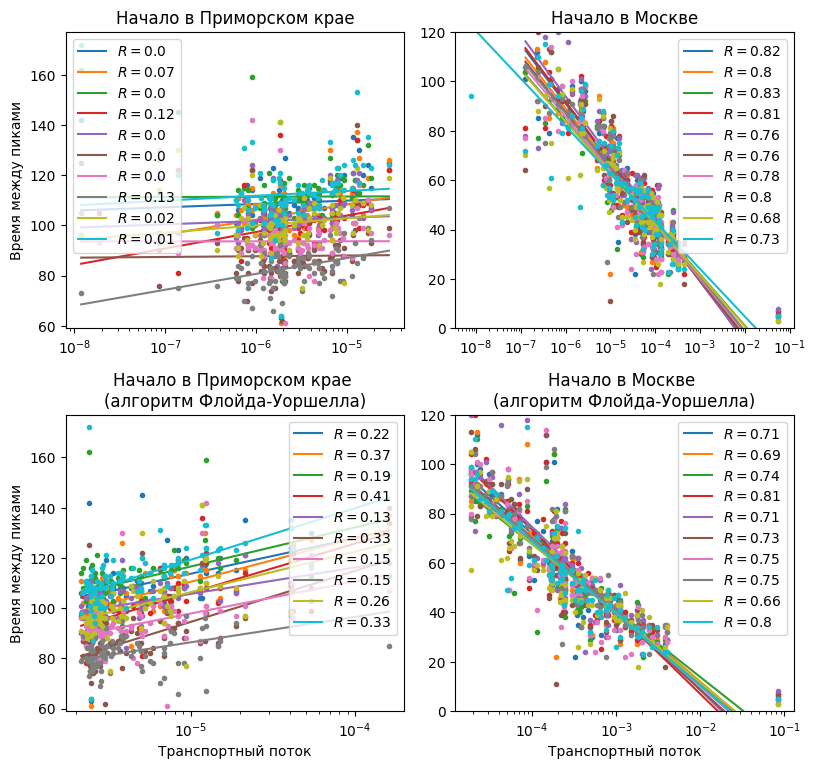

In [ ]:
import scipy.sparse as sparse
import scipy.stats as sps

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

fig, axes = plt.subplots(2, 2, figsize=(A4_WIDTH, A4_HEIGHT/1.5))

seeds = 10
colors = sns.color_palette('tab10')
transparency = 1

for k in range(seeds):
    for j, start_city in enumerate([9, 12]):
        dt = np.load(f'pkls/{labels[start_city]}_combined.npy', allow_pickle=True)[k,:,0,:duration]

        lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
        flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': flows
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        
        axes[0,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[0,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[0,j].set_xscale('log')
        axes[0,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        if j==0:
            axes[0,j].set_ylabel('Время между пиками')
        axes[0,j].set_title(f'Начало в {lbls[j]}')
        print(intercept, slope, r**2)
        print(np.std(scatter_data['lag'] - intercept - slope * np.log10(scatter_data['flow'])))

        log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]
        graph = sparse.csr_array(log_flows)

        dist_matrix, predecessors = sparse.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
        dist_matrix

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': dist_matrix[start_city,:]
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        scatter_data['flow'] = 10**(-scatter_data['flow']) - 1e-16
        # axes[1,j].plot(10**(-scatter_data['flow']) - 1e-16, scatter_data['lag'], '.')

        # slope, intercept, r, p, se = sps.linregress(scatter_data['flow'], scatter_data['lag'])
        # x = np.linspace(np.min(scatter_data['flow']), np.max(scatter_data['flow']), 100)
        # axes[1,j].plot(x, intercept + slope * x)

        # axes[1,j].set_xscale('log')

        axes[1,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[1,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[1,j].set_xscale('log')
        axes[1,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        axes[1,j].set_xlabel('Транспортный поток')
        if j==0:
            axes[1,j].set_ylabel('Время между пиками')
        axes[1,j].set_title(f'Начало в {lbls[j]} \n(алгоритм Флойда-Уоршелла)')
        print(intercept, slope, r**2)

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
# plt.legend()
plt.tight_layout()
plt.savefig('graphs/country_multyscatter.pdf')
plt.savefig('graphs/country_multyscatter.png', dpi=600)
plt.show()


[7.77041000e-06 6.04631813e-07 1.36668616e-05 3.23103780e-06
 3.39558609e-06 8.36974016e-06 8.59895838e-08 9.15490492e-07
 1.85270291e-06 0.00000000e+00 3.89317318e-06 6.83689172e-06
 1.87635907e-05 1.52559064e-06 1.43542050e-06 9.05555612e-06
 4.35210977e-06 1.87136380e-08 3.86467609e-06 2.04010793e-06
 1.23728381e-05 3.62072452e-06 3.33225601e-06 5.30005621e-06
 1.40272195e-06 6.31830823e-07 3.75593261e-07 7.44302266e-06
 5.69132393e-06 1.11351335e-06 8.07985905e-07 7.95515437e-06
 2.89077314e-06 1.21801486e-06 6.92378142e-06 2.04495935e-06
 3.02711519e-06 1.75796158e-06 2.11857900e-06 1.48162375e-06
 1.94145014e-06 1.13826479e-06 1.20608205e-06 4.95566524e-06
 1.43916961e-06 1.94314637e-06 9.06912296e-07 1.54690190e-06
 1.94162964e-06 2.07209106e-06 1.61620711e-06 8.28179682e-07
 1.77932972e-06 4.98609205e-06 1.69597162e-06 1.45241813e-06
 1.16184444e-05 7.44309257e-07 1.62808614e-06 1.39704432e-07
 1.13960833e-05 6.59762012e-06 4.35943239e-06 4.83159883e-06
 1.47778002e-06 2.044303

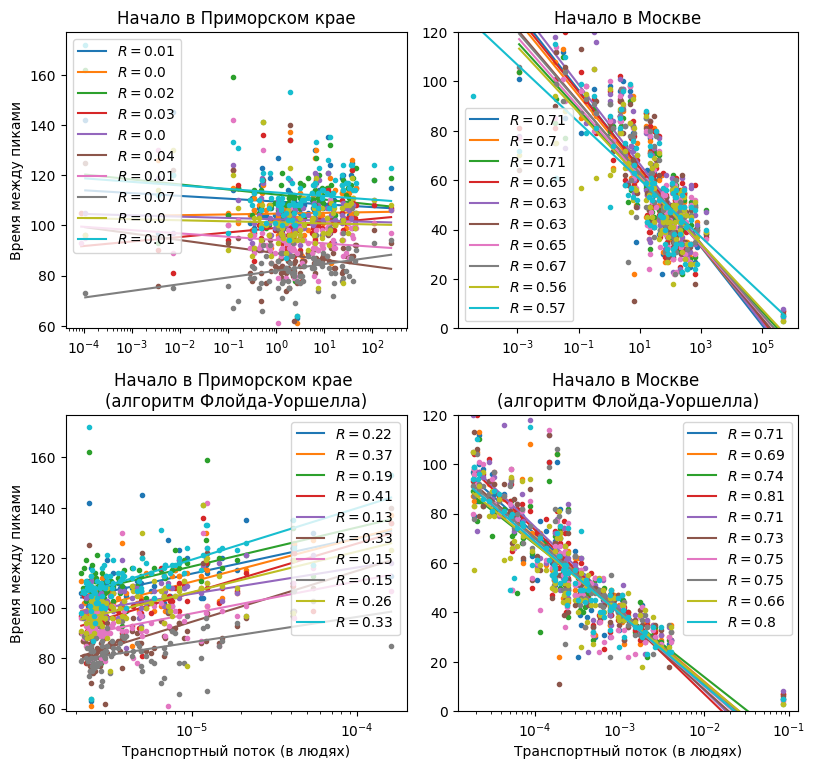

In [11]:
import scipy.sparse as sparse
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

A4_WIDTH = 8.27 
A4_HEIGHT = 11.69

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

labels = np.load('data/labels.npy', allow_pickle=True)
populations = np.load('data/populations.npy', allow_pickle=True) * 10
lbls = ['Приморском крае', 'Москве']

fig, axes = plt.subplots(2, 2, figsize=(A4_WIDTH, A4_HEIGHT/1.5))

seeds = 10
colors = sns.color_palette('tab10')
transparency = 1

for k in range(seeds):
    for j, start_city in enumerate([9, 12]):
        dt = np.load(f'pkls/{labels[start_city]}_combined.npy', allow_pickle=True)[k,:,0,:duration]

        lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
        flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]
        print(flows)
        print(flows*populations)
        flows = flows * populations

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': flows
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        
        axes[0,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[0,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[0,j].set_xscale('log')
        axes[0,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        if j==0:
            axes[0,j].set_ylabel('Время между пиками')
        axes[0,j].set_title(f'Начало в {lbls[j]}')
        print(intercept, slope, r**2)
        print(np.std(scatter_data['lag'] - intercept - slope * np.log10(scatter_data['flow'])))

        log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]
        graph = sparse.csr_array(log_flows)

        dist_matrix, predecessors = sparse.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
        dist_matrix

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': dist_matrix[start_city,:]
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        scatter_data['flow'] = 10**(-scatter_data['flow']) - 1e-16
        # axes[1,j].plot(10**(-scatter_data['flow']) - 1e-16, scatter_data['lag'], '.')

        # slope, intercept, r, p, se = sps.linregress(scatter_data['flow'], scatter_data['lag'])
        # x = np.linspace(np.min(scatter_data['flow']), np.max(scatter_data['flow']), 100)
        # axes[1,j].plot(x, intercept + slope * x)

        # axes[1,j].set_xscale('log')

        axes[1,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[1,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[1,j].set_xscale('log')
        axes[1,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        axes[1,j].set_xlabel('Транспортный поток (в людях)')
        if j==0:
            axes[1,j].set_ylabel('Время между пиками')
        axes[1,j].set_title(f'Начало в {lbls[j]} \n(алгоритм Флойда-Уоршелла)')
        print(intercept, slope, r**2)

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
# plt.legend()
plt.tight_layout()
plt.savefig('graphs/country_multyscatter_realflow.pdf')
plt.savefig('graphs/country_multyscatter_realflow.png', dpi=600)
plt.show()


In [ ]:
import scipy.sparse as sparse
import scipy.stats as sps
from scipy.stats import rankdata

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

seeds = 10
colors = sns.color_palette('tab10')
transparency = 1

ranks = {j: np.zeros(len(labels)) for j in [9,12]}

for j, start_city in enumerate([9, 12]):
    for k in range(seeds):
        dt = np.load(f'pkls/{labels[start_city]}_combined.npy', allow_pickle=True)[k,:,0,:duration]

        lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
        flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': flows
        }

        ranks[start_city] += rankdata(lags, method='average')


print(labels[np.argsort(ranks[9])][:10])
print(labels[np.argsort(ranks[12])][:10])

['Приморский край' 'Луганская Народная Республика' 'Чукотский АО'
 'Курская область' 'Ивановская область' 'Запорожская область'
 'Брянская область' 'Ульяновская область' 'Чувашская Республика'
 'Донецкая Народная Республика']
['Москва' 'Московская область' 'Тульская область' 'Владимирская область'
 'Калужская область' 'Чукотский АО' 'Тверская область'
 'Луганская Народная Республика' 'Ярославская область' 'Рязанская область']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\347876213.py:13: RuntimeWarning:

invalid value encountered in divide



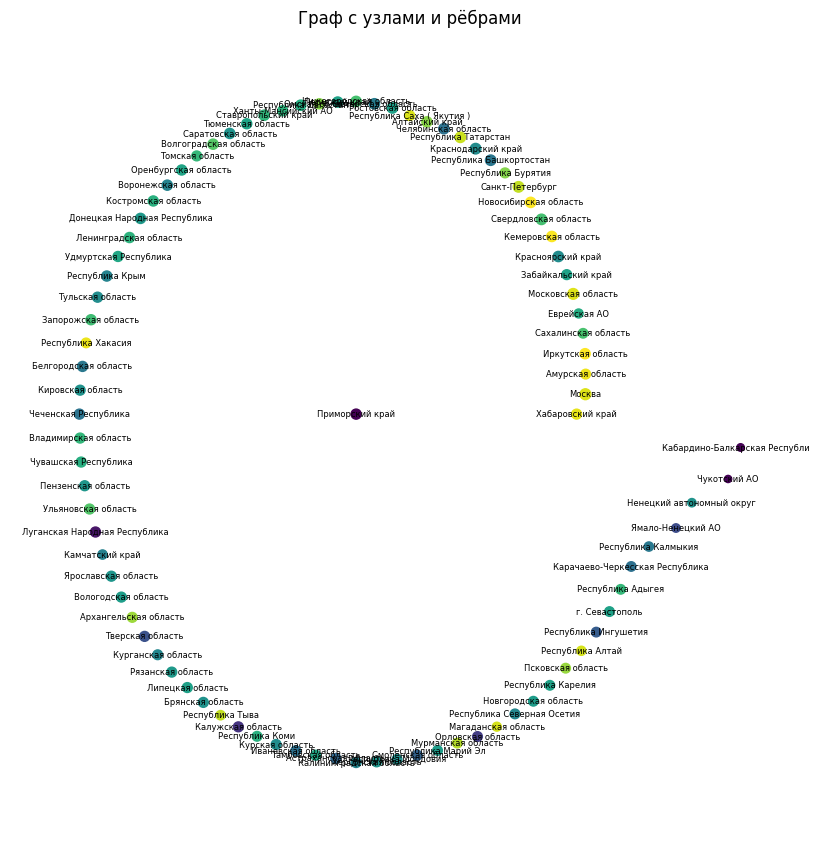

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

start_city = 9
populations = 10*np.log10(np.load('data/populations.npy', allow_pickle=True))
labels = np.load('data/labels.npy', allow_pickle=True)
flows = np.load('data/flows.npy', allow_pickle=True)

day = 190
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
dt = np.array([row/np.max(row) for row in dt])
infs = np.nan_to_num(dt[:,day])
# print(infs)

G = nx.Graph()

for i, node in enumerate(labels):
    G.add_node(node, size=populations[i], color_attr=infs[i])

for i in range(len(labels)):
    if flows[start_city][i] > 0: 
        G.add_edge(labels[start_city], labels[i], weight=-np.log10(flows[start_city][i]))

# pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)

# for u, v, d in G.edges(data=True):
#     d['inv_weight'] = 1 / d['weight']

# pos = nx.spring_layout(G, weight='inv_weight')
# pos = nx.kamada_kawai_layout(G, weight='weight')

pos = {}
pos[labels[start_city]] = (0, 0)

peripheral_nodes = [node for node in labels if node != labels[start_city]]
edge_weights_dict = {}
for node in peripheral_nodes:
    for u, v, d in G.edges(data=True):
        if (u == labels[start_city] and v == node) or (v == labels[start_city] and u == node):
            edge_weights_dict[node] = d['weight']
            break

sorted_peripheral_nodes = sorted(edge_weights_dict, key=edge_weights_dict.get)

n_peripheral = len(peripheral_nodes)
for i, node in enumerate(sorted_peripheral_nodes):
    angle = 2 * np.pi * i / n_peripheral
    radius = edge_weights_dict[node]
    pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

sizes = [G.nodes[node]['size'] for node in G.nodes]
edge_widths = [G[u][v]['weight']/5 for u, v in G.edges]
colors = [G.nodes[node]['color_attr'] for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos,
    with_labels=True, 
    node_size=sizes,   
    node_color=colors,
    cmap=plt.cm.viridis,
    font_size=6,  
    width=0, 
    edge_color='gray'  
)

plt.title("Граф с узлами и рёбрами")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


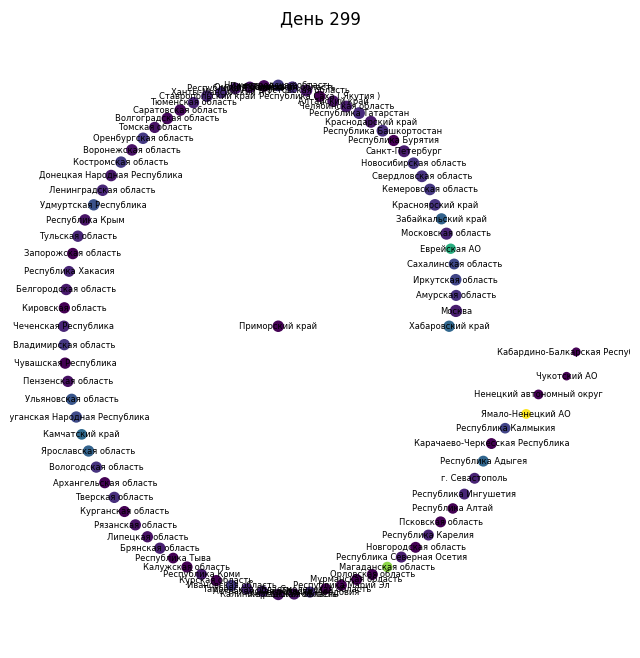

MovieWriter ffmpeg unavailable; using Pillow instead.


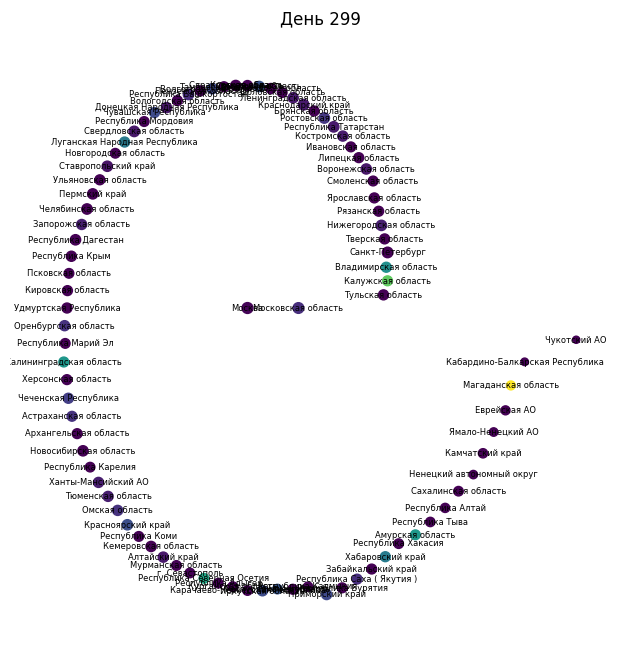

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

for start_city in [9,12]:
    populations = 10 * np.log10(np.load('data/populations.npy', allow_pickle=True))
    labels = np.load('data/labels.npy', allow_pickle=True)
    flows = np.load('data/flows.npy', allow_pickle=True)

    duration = 300
    dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0, :, 0, :duration]

    dt = np.array([row / (np.max(row) if np.max(row) != 0 else 1) for row in dt])
    dt = np.nan_to_num(dt)

    G = nx.Graph()
    for i, node in enumerate(labels):
        G.add_node(node, size=populations[i])
    for i in range(len(labels)):
        if flows[start_city][i] > 0:
            G.add_edge(labels[start_city], labels[i], weight=-np.log10(flows[start_city][i]))

    pos = {}
    pos[labels[start_city]] = (0, 0)
    peripheral_nodes = [node for node in labels if node != labels[start_city]]
    edge_weights_dict = {}
    for node in peripheral_nodes:
        for u, v, d in G.edges(data=True):
            if (u == labels[start_city] and v == node) or (v == labels[start_city] and u == node):
                edge_weights_dict[node] = d['weight']
                break
    sorted_peripheral_nodes = sorted(edge_weights_dict, key=edge_weights_dict.get)
    n_peripheral = len(peripheral_nodes)
    for i, node in enumerate(sorted_peripheral_nodes):
        angle = 2 * np.pi * i / n_peripheral
        radius = edge_weights_dict[node]
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

    fig, ax = plt.subplots(figsize=(8, 8))

    start_anim = 100

    def update(day):
        ax.clear()
        infs = np.nan_to_num(dt[:, start_anim+day])
        
        node_colors = [infs[np.where(labels == node)[0][0]] for node in G.nodes]
        
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_size=[G.nodes[node]['size'] for node in G.nodes],
            node_color=node_colors,
            cmap=plt.cm.viridis,
            font_size=6,
            width=0,
            edge_color='gray',
            ax=ax
        )
        ax.set_title(f"День {start_anim+day}")

    ani = FuncAnimation(fig, update, frames=duration-start_anim, interval=250, repeat=True)

    try:
        ani.save(f'graphs/country_graph_animation_{labels[start_city]}.mp4', writer='ffmpeg', fps=10)
    except:
        ani.save(f'graphs/country_graph_animation_{labels[start_city]}.gif', writer='pillow', fps=10)

    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4292832090.py:13: RuntimeWarning:

invalid value encountered in divide

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4292832090.py:26: RuntimeWarning:

divide by zero encountered in log10



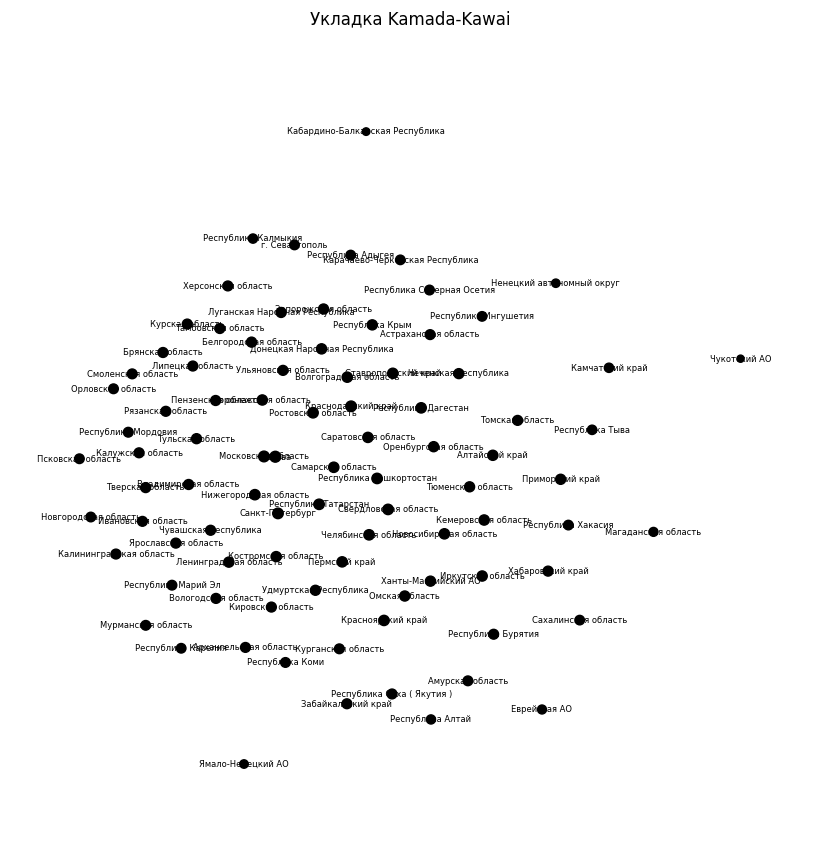

MovieWriter ffmpeg unavailable; using Pillow instead.


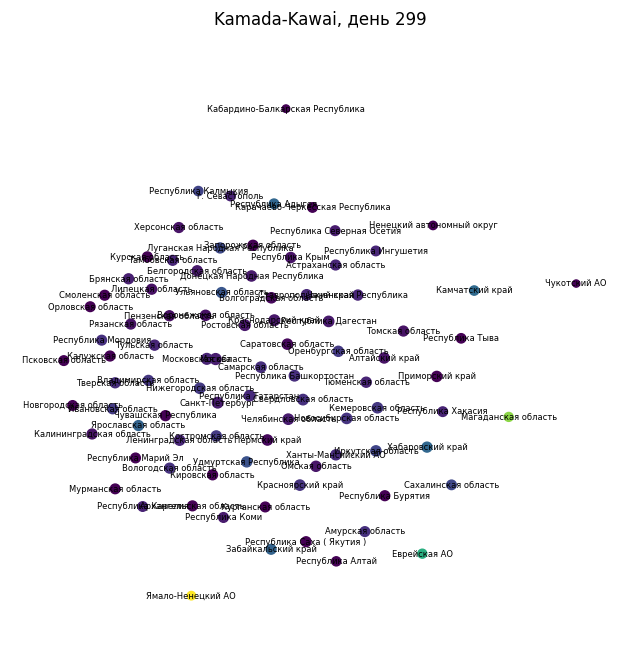

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

start_city = 9
populations = 10*np.log10(np.load('data/populations.npy', allow_pickle=True))
labels = np.load('data/labels.npy', allow_pickle=True)
flows = np.load('data/flows.npy', allow_pickle=True)

day = 190
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
dt = np.array([row/np.max(row) for row in dt])
infs = np.nan_to_num(dt[:,day])
# print(infs)

G = nx.Graph()

for i, node in enumerate(labels):
    G.add_node(node, size=populations[i], color_attr=infs[i])

populations = np.load('data/populations.npy', allow_pickle=True) * 10
flows = np.load('data/flows.npy', allow_pickle=True)
flows = np.array([365 * row * populations[i] for i, row in enumerate(flows)])
flows = (flows + flows.T)/2
flows = np.where(flows == 0, 0, -np.log10(flows))
flows -= np.min(flows)

for i in range(len(labels)):
    for j in range(i, len(labels)):
        if flows[i][j] > 0: 
            G.add_edge(labels[i], labels[j], weight=flows[i][j])


pos = nx.kamada_kawai_layout(G, weight='weight')

sizes = [G.nodes[node]['size'] for node in G.nodes]
edge_widths = [G[u][v]['weight']/5 for u, v in G.edges]
colors = [G.nodes[node]['color_attr'] for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos,
    with_labels=True, 
    node_size=sizes,   
    node_color='black',
    font_size=6,  
    width=0, 
    edge_color='gray'  
)

plt.title("Укладка Kamada-Kawai")
plt.show()

duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0, :, 0, :duration]

dt = np.array([row / (np.max(row) if np.max(row) != 0 else 1) for row in dt])
dt = np.nan_to_num(dt)

fig, ax = plt.subplots(figsize=(8, 8))

start_anim = 100

def update(day):
    ax.clear()
    infs = np.nan_to_num(dt[:, start_anim+day])
    
    node_colors = [infs[np.where(labels == node)[0][0]] for node in G.nodes]
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=[G.nodes[node]['size'] for node in G.nodes],
        node_color=node_colors,
        cmap=plt.cm.viridis,
        font_size=6,
        width=0,
        edge_color='gray',
        ax=ax
    )
    ax.set_title(f"Kamada-Kawai, день {start_anim+day}")

ani = FuncAnimation(fig, update, frames=duration-start_anim, interval=250, repeat=True)

try:
    ani.save(f'graphs/country_graph_animation_Kamada-Kawai_{labels[start_city]}.mp4', writer='ffmpeg', fps=10)
except:
    ani.save(f'graphs/country_graph_animation_Kamada-Kawai_{labels[start_city]}.gif', writer='pillow', fps=10)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4289704482.py:14: RuntimeWarning:

invalid value encountered in divide

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\4289704482.py:32: RuntimeWarning:

divide by zero encountered in log10



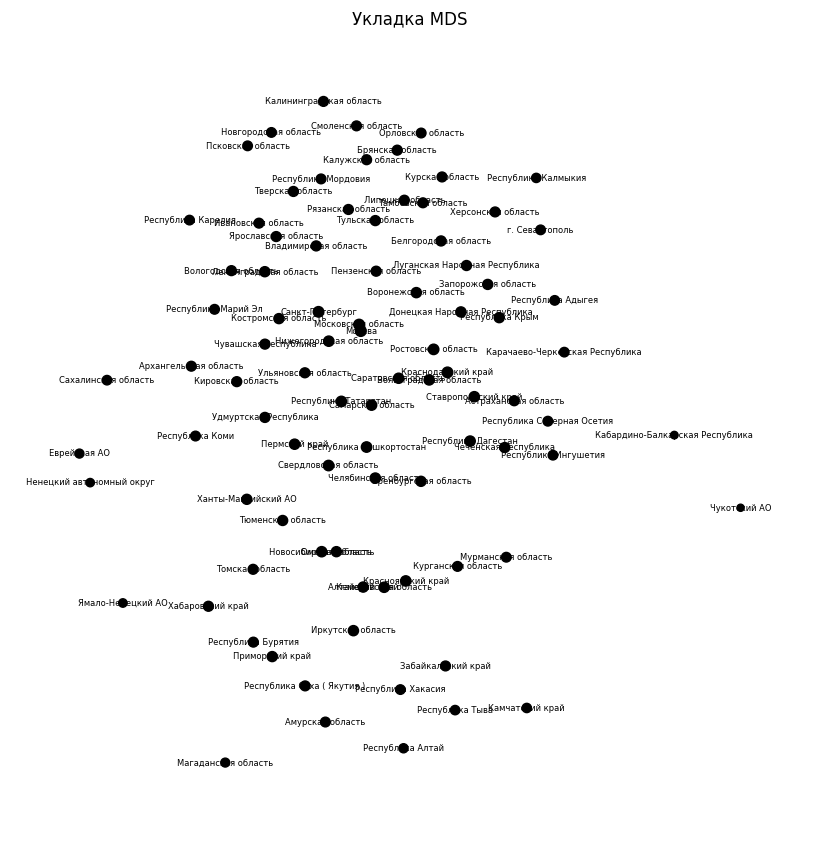

MovieWriter ffmpeg unavailable; using Pillow instead.


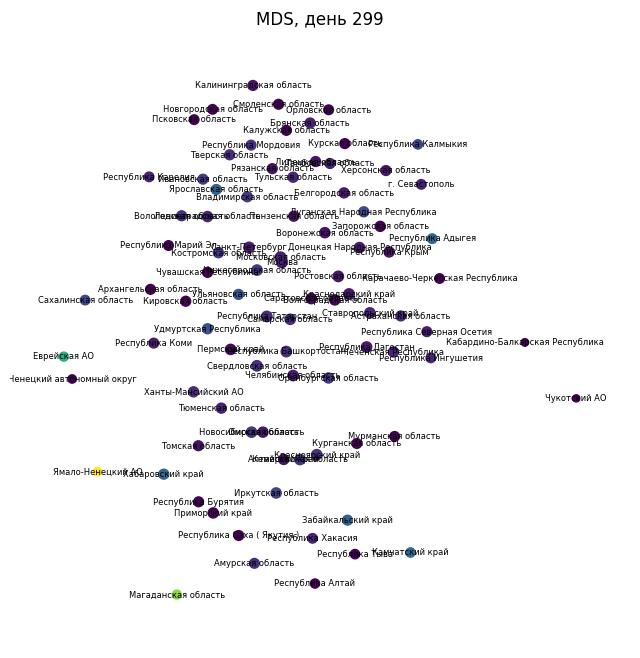

In [ ]:
from sklearn.manifold import MDS
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

start_city = 9
populations = 10*np.log10(np.load('data/populations.npy', allow_pickle=True))
labels = np.load('data/labels.npy', allow_pickle=True)
flows = np.load('data/flows.npy', allow_pickle=True)

day = 190
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
dt = np.array([row/np.max(row) for row in dt])
infs = np.nan_to_num(dt[:,day])
# print(infs)

G = nx.Graph()

for i, node in enumerate(labels):
    G.add_node(node, size=populations[i], color_attr=infs[i])

for i in range(len(labels)):
    for j in range(i, len(labels)):
        if flows[i][j] > 0: 
            G.add_edge(labels[i], labels[j], weight=-np.log10(flows[i][j]))

populations = np.load('data/populations.npy', allow_pickle=True) * 10
flows = np.load('data/flows.npy', allow_pickle=True)
flows = np.array([365 * row * populations[i] for i, row in enumerate(flows)])
flows = (flows + flows.T)/2
flows = np.where(flows == 0, 0, -np.log10(flows))
flows -= np.min(flows)

mds = MDS(n_components=2, dissimilarity='precomputed')
pos_array = mds.fit_transform(flows)

pos = {node: pos_array[i] for i, node in enumerate(G.nodes)}



sizes = [G.nodes[node]['size'] for node in G.nodes]
edge_widths = [G[u][v]['weight']/5 for u, v in G.edges]
colors = [G.nodes[node]['color_attr'] for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos,
    with_labels=True, 
    node_size=sizes,   
    node_color='black',
    font_size=6,  
    width=0, 
    edge_color='gray'  
)

plt.title("Укладка MDS")
plt.show()

duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0, :, 0, :duration]

dt = np.array([row / (np.max(row) if np.max(row) != 0 else 1) for row in dt])
dt = np.nan_to_num(dt)

fig, ax = plt.subplots(figsize=(8, 8))

start_anim = 100

def update(day):
    ax.clear()
    infs = np.nan_to_num(dt[:, start_anim+day])
    
    node_colors = [infs[np.where(labels == node)[0][0]] for node in G.nodes]
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=[G.nodes[node]['size'] for node in G.nodes],
        node_color=node_colors,
        cmap=plt.cm.viridis,
        font_size=6,
        width=0,
        edge_color='gray',
        ax=ax
    )
    ax.set_title(f"MDS, день {start_anim+day}")

ani = FuncAnimation(fig, update, frames=duration-start_anim, interval=250, repeat=True)

try:
    ani.save(f'graphs/country_graph_animation_MDS_{labels[start_city]}.mp4', writer='ffmpeg', fps=10)
except:
    ani.save(f'graphs/country_graph_animation_MDS_{labels[start_city]}.gif', writer='pillow', fps=10)

plt.show()

[[0.00000000e+00 3.66576641e+02 1.05104061e+03 ... 1.24401325e+03
  1.75762068e+03 1.17034138e+03]
 [3.66575737e+02 0.00000000e+00 9.80518438e+01 ... 1.40602673e+04
  2.09552771e+04 1.19089434e+04]
 [1.05102893e+03 9.80509960e+01 0.00000000e+00 ... 3.44503564e+02
  4.78448291e+02 3.14389349e+02]
 ...
 [1.24401894e+03 1.40603663e+04 3.44508968e+02 ... 0.00000000e+00
  4.55531421e+05 1.17788532e+05]
 [1.75763033e+03 2.09554438e+04 4.78456235e+02 ... 4.55531839e+05
  0.00000000e+00 5.01047376e+05]
 [1.17034602e+03 1.19090200e+04 3.14394089e+02 ... 1.17788460e+05
  5.01046610e+05 0.00000000e+00]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20848\776525413.py:4: RuntimeWarning:

divide by zero encountered in log10



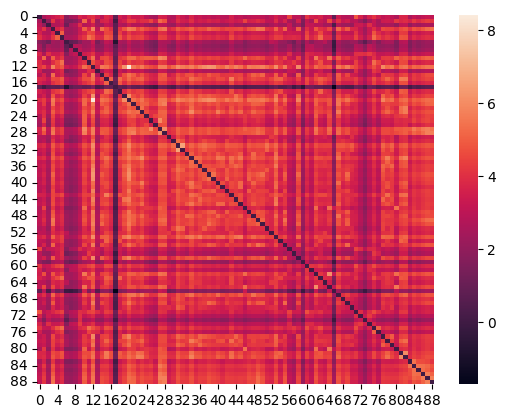

In [ ]:
populations = np.load('data/populations.npy', allow_pickle=True) * 10
flows = np.load('data/flows.npy', allow_pickle=True)
flows = np.array([365 * row * populations[i] for i, row in enumerate(flows)])
sns.heatmap(np.where(flows <= 0, 0, np.log10(flows)))
print(flows)

In [ ]:
duration = 251
start_city = 9
files = [f'pkls/{labels[start_city]}.npy', f'pkls/{labels[start_city]}_new.npy', f'pkls/{labels[start_city]}_newnew.npy']

np.save(f'pkls/{labels[start_city]}_combined.npy', np.concatenate([np.load(file, allow_pickle=True)[:,:,:,:duration] for file in files], axis=0))

dict_keys(['new_departing', 'new_tourists', 'infected_new_departing', 'infected_new_tourists', 'severe_new_tourists', 'critical_new_tourists', 'dead_new_tourists', 'infectious_new_tourists', 'symptomatic_new_tourists', 'back_infected', 'back_severe', 'back_critical', 'back_dead', 'back_infectious', 'back_symptomatic', 'in_city_count'])
(89, 252)
dict_keys(['new_departing', 'new_tourists', 'infected_new_departing', 'infected_new_tourists', 'severe_new_tourists', 'critical_new_tourists', 'dead_new_tourists', 'infectious_new_tourists', 'symptomatic_new_tourists', 'back_infected', 'back_severe', 'back_critical', 'back_dead', 'back_infectious', 'back_symptomatic', 'in_city_count'])
(89, 252)


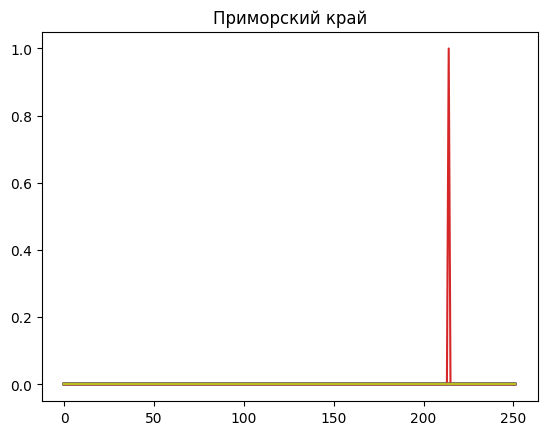

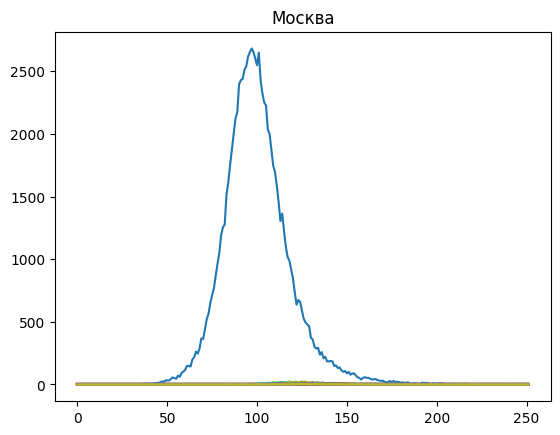

In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

labels = np.load('data/labels.npy', allow_pickle=True)

for start_city in [9, 12]:
    seed = 0

    with open(f'pkls/tourism_stats_{seed}_{labels[start_city]}.pkl', 'rb') as file:
        tourism_stats = pickle.load(file)

    print(tourism_stats[0].keys())
    print(tourism_stats[0]['infected_new_tourists'].shape)
    fig, ax = plt.subplots()
    ax.plot(np.array(tourism_stats[start_city]['infected_new_tourists']).T)
    ax.set_title(labels[start_city])

In [48]:
np.nonzero(tourism_stats[start_city]['infected_new_tourists'])

(array([ 1,  1,  3, ..., 88, 88, 88], dtype=int64),
 array([174, 177,  93, ..., 184, 189, 221], dtype=int64))

In [ ]:
seed = 0
start_city = 9

with open(f'pkls/tourism_stats_{seed}_{labels[start_city]}.pkl', 'rb') as file:
    tourism_stats = pickle.load(file)

adj = np.full(len(labels), np.nan)

for i in range(len(labels)):
    stat = tourism_stats[i]['infected_new_tourists']
    try:
        adj[i] = np.nonzero(stat)[0][np.argmin(np.nonzero(stat)[1])]
        pass
    except:
        pass
    
print(labels[start_city])
adj

Приморский край


array([71., 27., nan, 88.,  5., 16., nan, nan, nan, 73., 88.,  5., 88.,
       nan, 88., 16., 15., nan, 16., 12., 12., 88., 28., 88., 28., 28.,
       28., 88., 88., 31., 31., 32., 31., 28., 28., 78., 20., 32., 88.,
       28., 23., 45., 12., 28., 36., 28., 80., 87., 28., 88., 88., 31.,
       12., 19., 81., 88.,  0., nan, 38., nan, 71., nan, 28., 15., 15.,
       80., nan, 23., 12., 38., 31.,  0., 74., nan,  9., 63., 75., 19.,
       35., 44., 28., 63., 28., 12., 88., 88., 88., 88.,  9.])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13212\4203941438.py:14: RuntimeWarning: invalid value encountered in divide
  dt = np.array([row/np.max(row) for row in dt])


[71. 27. nan 88.  5. 16. nan nan nan 73. 88.  5. 88. nan 88. 16. 15. nan
 16. 12. 12. 88. 28. 88. 28. 28. 28. 88. 88. 31. 31. 32. 31. 28. 28. 78.
 20. 32. 88. 28. 23. 45. 12. 28. 36. 28. 80. 87. 28. 88. 88. 31. 12. 19.
 81. 88.  0. nan 38. nan 71. nan 28. 15. 15. 80. nan 23. 12. 38. 31.  0.
 74. nan  9. 63. 75. 19. 35. 44. 28. 63. 28. 12. 88. 88. 88. 88.  9.]


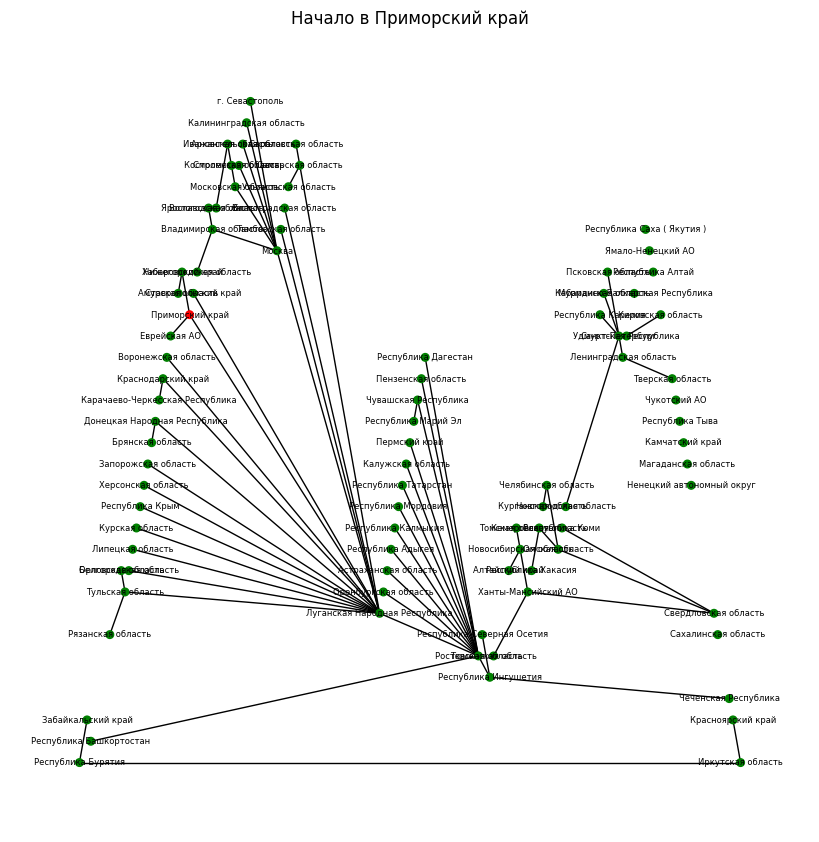

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle

start_city = 9
populations = 10*np.log10(np.load('data/populations.npy', allow_pickle=True))
labels = np.load('data/labels.npy', allow_pickle=True)
flows = np.load('data/flows.npy', allow_pickle=True)

day = 190
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
dt = np.array([row/np.max(row) for row in dt])
infs = np.nan_to_num(dt[:,day])
# print(infs)

G = nx.Graph()

for i, node in enumerate(labels):
    G.add_node(node, size=populations[i], color_attr=infs[i])


seed = 0
with open(f'pkls/tourism_stats_{seed}_{labels[start_city]}.pkl', 'rb') as file:
    tourism_stats = pickle.load(file)

adj = np.full(len(labels), np.nan)

for i in range(len(labels)):
    stat = tourism_stats[i]['infected_new_tourists']
    try:
        adj[i] = np.nonzero(stat)[0][np.argmin(np.nonzero(stat)[1])]
        pass
    except:
        # print(labels[i], np.nonzero(stat), np.nonzero(tourism_stats[i]['infectious_new_tourists']))
        pass

print(adj)

for i in range(len(labels)):
    if not np.isnan(adj[i]): 
        G.add_edge(labels[int(adj[i])], labels[i], weight=1)

# pos = nx.spring_layout(G)
# pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
# pos = nx.circular_layout(G)

# for u, v, d in G.edges(data=True):
#     d['inv_weight'] = 1 / d['weight']

# pos = nx.spring_layout(G, weight='inv_weight')
# pos = nx.kamada_kawai_layout(G, weight='weight')
pos = nx.planar_layout(G)

sizes = [G.nodes[node]['size'] for node in G.nodes]
edge_widths = [G[u][v]['weight']/5 for u, v in G.edges]
colors = ['green' if node != labels[start_city] else 'red' for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos,
    with_labels=True, 
    node_size=30,   
    node_color=colors,
    # cmap=plt.cm.viridis,
    font_size=6,  
    width=1, 
    edge_color='black'  
)

plt.title(f"Начало в {labels[start_city]}")
plt.savefig(f'graphs/country_transitions_{labels[start_city]}.png', dpi=600)
plt.show()

116.44296953075391 1.3195810946924889 0.00412414143383418
10.56763606748895
184.76119676028088 14.21128437682018 0.2249043469238221
88
[ 3 10 12 14 21 23 27 28 38 49 50 55 84 85 86 87]
-52.97788398624446 -24.001494482301684 0.81616895310651
10.19185182165958
-50.80839617080705 -30.642190482963418 0.7068649683593767
12
[ 3 11 14 15 16 18 19 20 21 22 24 25 27 28 29 31 32 33 34 35 38 40 42 43
 45 46 47 48 50 51 52 53 54 58 60 62 63 64 65 67 68 69 75 77 78 79 82 83
 85 86 87 88]


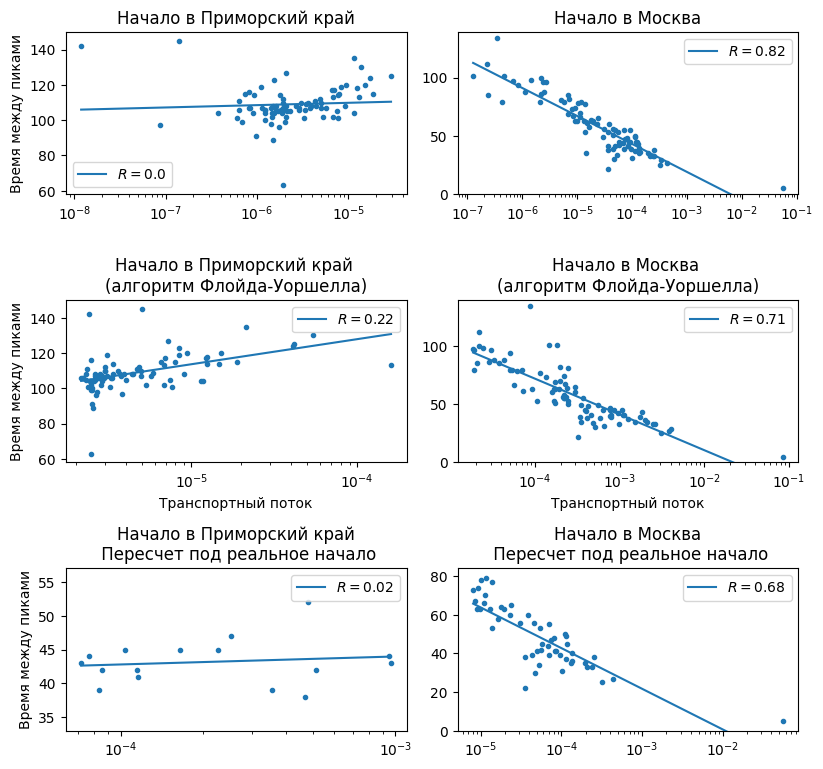

In [35]:
import scipy.sparse as sparse
import scipy.stats as sps
import seaborn as sns
import pandas as pd

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

A4_WIDTH = 8.27 
A4_HEIGHT = 11.69/1

labels = np.load('data/labels.npy', allow_pickle=True)

fig, axes = plt.subplots(3, 2, figsize=(A4_WIDTH, A4_HEIGHT/1.5))

seeds = 1
colors = sns.color_palette('tab10')
transparency = 1

for k in range(seeds):
    for j, start_city in enumerate([9, 12]):
        dt = np.load(f'pkls/{labels[start_city]}_combined.npy', allow_pickle=True)[k,:,0,:duration]

        lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
        flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': flows
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        
        axes[0,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[0,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[0,j].set_xscale('log')
        axes[0,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        if j==0:
            axes[0,j].set_ylabel('Время между пиками')
        axes[0,j].set_title(f'Начало в {labels[start_city]}')
        print(intercept, slope, r**2)
        print(np.std(scatter_data['lag'] - intercept - slope * np.log10(scatter_data['flow'])))

        log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]
        graph = sparse.csr_array(log_flows)

        dist_matrix, predecessors = sparse.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
        dist_matrix

        scatter_data = {
            'lag': lags,
            'region': labels,
            'flow': dist_matrix[start_city,:]
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        scatter_data['flow'] = 10**(-scatter_data['flow']) - 1e-16
        # axes[1,j].plot(10**(-scatter_data['flow']) - 1e-16, scatter_data['lag'], '.')

        # slope, intercept, r, p, se = sps.linregress(scatter_data['flow'], scatter_data['lag'])
        # x = np.linspace(np.min(scatter_data['flow']), np.max(scatter_data['flow']), 100)
        # axes[1,j].plot(x, intercept + slope * x)

        # axes[1,j].set_xscale('log')

        axes[1,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[1,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[1,j].set_xscale('log')
        axes[1,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        axes[1,j].set_xlabel('Транспортный поток')
        if j==0:
            axes[1,j].set_ylabel('Время между пиками')
        axes[1,j].set_title(f'Начало в {labels[start_city]} \n(алгоритм Флойда-Уоршелла)')
        print(intercept, slope, r**2)






        with open(f'pkls/tourism_stats_{seed}_{labels[start_city]}.pkl', 'rb') as file:
            tourism_stats = pickle.load(file)

        adj = np.full(len(labels), np.nan)

        for i in range(len(labels)):
            stat = tourism_stats[i]['infected_new_tourists']
            try:
                adj[i] = np.nonzero(stat)[0][np.argmin(np.nonzero(stat)[1])]
                pass
            except:
                # print(labels[i], np.nonzero(stat), np.nonzero(tourism_stats[i]['infectious_new_tourists']))
                pass

        values, counts = np.unique(adj, return_counts=True)
        real_start = int(values[counts.argmax()])
        print(real_start)

        cities_list = np.argwhere(adj == real_start).flatten()
        print(cities_list)

        lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[real_start,:]) for i in cities_list])
        flows = np.array([np.load('data/flows.npy', allow_pickle=True)[real_start,i] for i in cities_list])
        region_labels = np.array([np.load('data/labels.npy', allow_pickle=True)[i] for i in cities_list])

        scatter_data = {
            'lag': lags,
            'region': region_labels,
            'flow': flows
        }

        scatter_data = pd.DataFrame(scatter_data)
        scatter_data = scatter_data[scatter_data['lag'] > 0]
        
        axes[2,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[k], alpha=transparency)

        slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
        x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
        axes[2,j].plot(10**x, intercept + slope * x, color=colors[k], alpha=transparency, label=f'$R = {round(r**2, 2)}$')

        axes[2,j].set_xscale('log')
        axes[2,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
        if j==0:
            axes[2,j].set_ylabel('Время между пиками')
        axes[2,j].set_title(f'Начало в {labels[start_city]}\n Пересчет под реальное начало')
        

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[2,0].legend()
axes[2,1].legend()
# plt.legend()
plt.tight_layout()
plt.savefig('graphs/country_multyscatter_informed.pdf')
plt.savefig('graphs/country_multyscatter_informed.png', dpi=600)
plt.show()


In [ ]:
import qrcode

url = "https://github.com/KonstantinKlochkovv/bachelor-thesis"

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(url)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("graphs/qrcode.png")

In [14]:
!pip install qrcode pillow